In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor

In [120]:
df = pd.read_csv('data.csv')

x = df['Experience']
y = df['Salary']

# 1.a

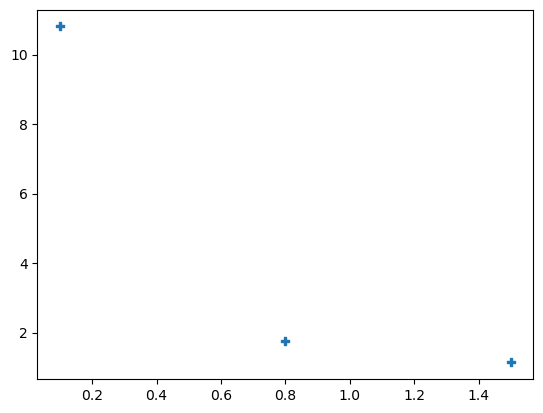

In [121]:
b1 = [.1, .8, 1.5]
b0 = 1.1

MSE = []

for slope in b1:
    pred = b0 + slope*x
    error = y - pred
    mse = sum(error**2)/len(error)
    MSE.append(mse)
    
plt.scatter(b1, MSE, marker='P')

# 1.b

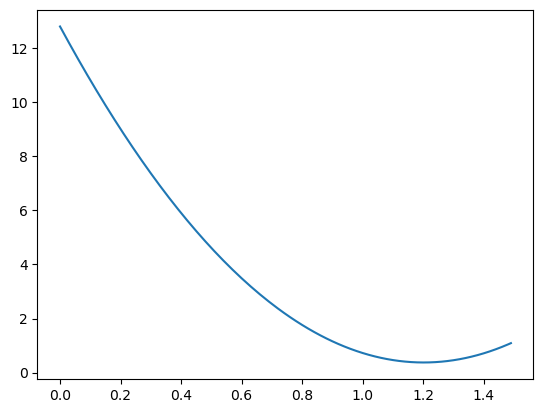

In [122]:
b1 = [x/100 for x in range(0,150)]

MSE.clear()

for slope in b1:
    pred = b0 + slope*x
    error = y - pred
    mse = sum(error**2)/len(error)
    MSE.append(mse)
    
plt.plot(b1, MSE)

# 1.c

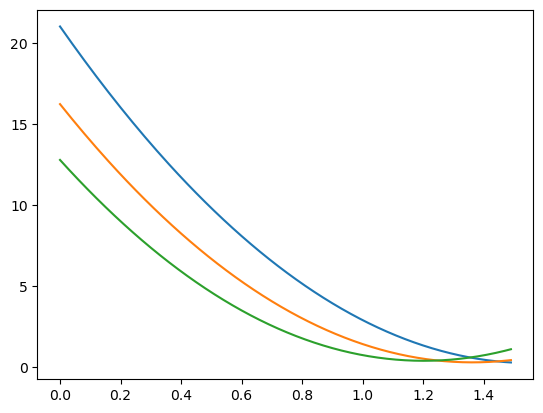

In [123]:
b0 = [0, 0.6, 1.1]

for _ in b0: 
    MSE.clear()
    for slope in b1:
        pred = _ + slope*x
        error = y - pred
        mse = sum(error**2)/len(error)
        MSE.append(mse)
    plt.plot(b1, MSE)

# 1.d

In [124]:
lr = LinearRegression()
lr.fit(x.to_numpy().reshape(-1,1), y.to_numpy().reshape(-1,1))
predictions = lr.predict(x.to_numpy().reshape(-1,1))

mse = mean_squared_error(y.to_numpy().reshape(-1,1), predictions)
print(f'MSE: {mse}')

MSE: 0.23366710810280555


# 2.a

B0: 0.4749574932319782, B1: 1.3938275172502381, MSE: 0.2629795496910306


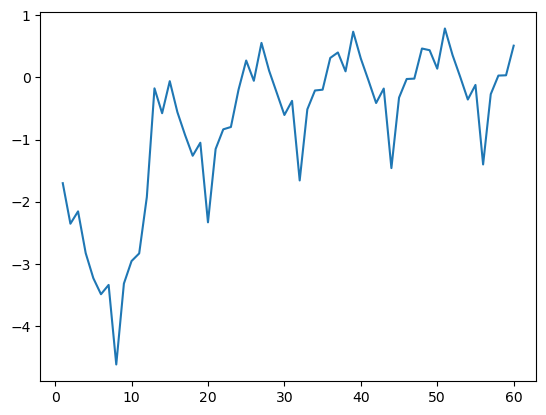

In [125]:
b0 = 0.0
b1 = 0.0
alpha = 0.01

err = []

for i in range(5):
    for x_, y_ in zip(x,y):
        pred = b0 + b1*x_
        delta = pred - y_
        err.append(delta)
    
        b0 -= alpha*delta
        b1 -= alpha*delta*x_
        
mse = sum(list(map(lambda n:n**2, [b0+b1*_ for _ in x]-y)))/len(x)
        
print(f'B0: {b0}, B1: {b1}, MSE: {mse}')

plt.plot(range(1,61), err)

# 2.b

In [126]:
sgd = SGDRegressor(alpha=0.01, max_iter=60)
sgd.fit(x.to_numpy().reshape(-1,1), y.to_numpy().reshape(-1,1))
predictions = sgd.predict(x.to_numpy().reshape(-1,1))

mse = mean_squared_error(y.ravel(), predictions)
print(f'MSE: {mse}')

MSE: 0.2575763177654388


/home/student/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Additional

In [127]:
dfa = pd.read_csv('Salary_Data.csv')

X = dfa['YearsExperience'].to_numpy().reshape(-1,1)
Y = dfa['Salary'].to_numpy().reshape(-1,1)

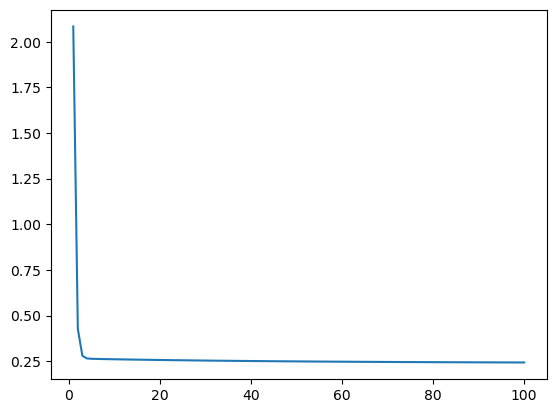

In [128]:
iterations = [x for x in range(1,101)]

MSE = []

b0 = b1 = 0.0
alpha = 0.01

for i in iterations:
    err = []
    for x_, y_ in zip(x,y):
        pred = b0 + b1*x_
        delta = pred - y_
        err.append(delta)
    
        b0 -= alpha*delta
        b1 -= alpha*delta*x_
        
    MSE.append(sum(list(map(lambda n:n**2, [b0+b1*_ for _ in x]-y)))/len(x))
    
plt.plot(iterations, MSE)